# Biodiversity in national parks #
    - For this project, we will interpret data from the National Parks Service about endangered species in different parks.

    - We will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, we will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

    - After we perform our analysis, we will share your findings about the National Park Service.

## Explore and analyse:
    - What is the distribution of conservation_status for animals?
    - Are certain types of species more likely to be endangered?
    - Are the differences between species and their conservation status significant?
    - Which species were spotted the most at each park?

In [59]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

In [60]:
# Load the data
species = pd.read_csv('/CodeAcademy/Portfolio/Codecademy-Data-Science-Portfolio/data_files/species_info.csv')
observations = pd.read_csv('/CodeAcademy/Portfolio/Codecademy-Data-Science-Portfolio/data_files/observations.csv')

In [61]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [62]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [63]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [64]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


### Analyse data:

- What is the distribution of conservation_status for animals?

In [65]:
species.conservation_status =  species.conservation_status.fillna('Unknown')
conservation_status = species.conservation_status.value_counts()
print(conservation_status)

Unknown               5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


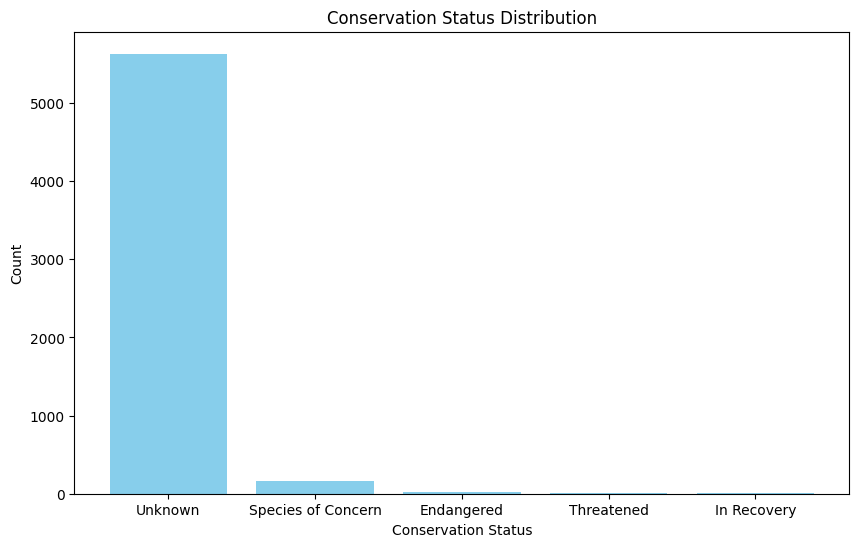

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(conservation_status.index, conservation_status.values, color='skyblue')
plt.title('Conservation Status Distribution')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

Based on the provided data, the majority of species (5633 out of 5824) in  dataset are categorized as `Unknown` with respect to their conservation status. This could indicate a lack of information, or that these species have yet to be evaluated.

`Species of Concern` make up the second largest category, with 161 species. These might be species that are not currently threatened, but may become vulnerable or threatened in the near future.

Next are `Endangered` (16 species) and `Threatened` (10 species). These are species that are experiencing serious threats to their survival in the wild.

Finally, `In Recovery` (4 species) are species that were on the brink of extinction but, thanks to conservation efforts, are showing signs of recovery.

It's evident that for most species, the conservation status remains unknown, which may suggest a need for more thorough monitoring and assessment of wildlife populations. For those species whose status is known, many are in need of further protection and conservation.

- Are certain types of species more likely to be endangered?

In [67]:
endangered_counts = species.groupby(['category', 'conservation_status'])['scientific_name'].count().reset_index()

endangered_counts = endangered_counts.rename(columns = {'scientific_name': 'count'})

endangered_counts = endangered_counts.sort_values(by='count', ascending=False)

In [68]:
endangered_counts

,category,conservation_status,count
24,Vascular Plant,Unknown,4424
7,Bird,Unknown,442
18,Nonvascular Plant,Unknown,328
16,Mammal,Unknown,176
11,Fish,Unknown,116
20,Reptile,Unknown,74
3,Amphibian,Unknown,73
6,Bird,Species of Concern,72
22,Vascular Plant,Species of Concern,43
14,Mammal,Species of Concern,28


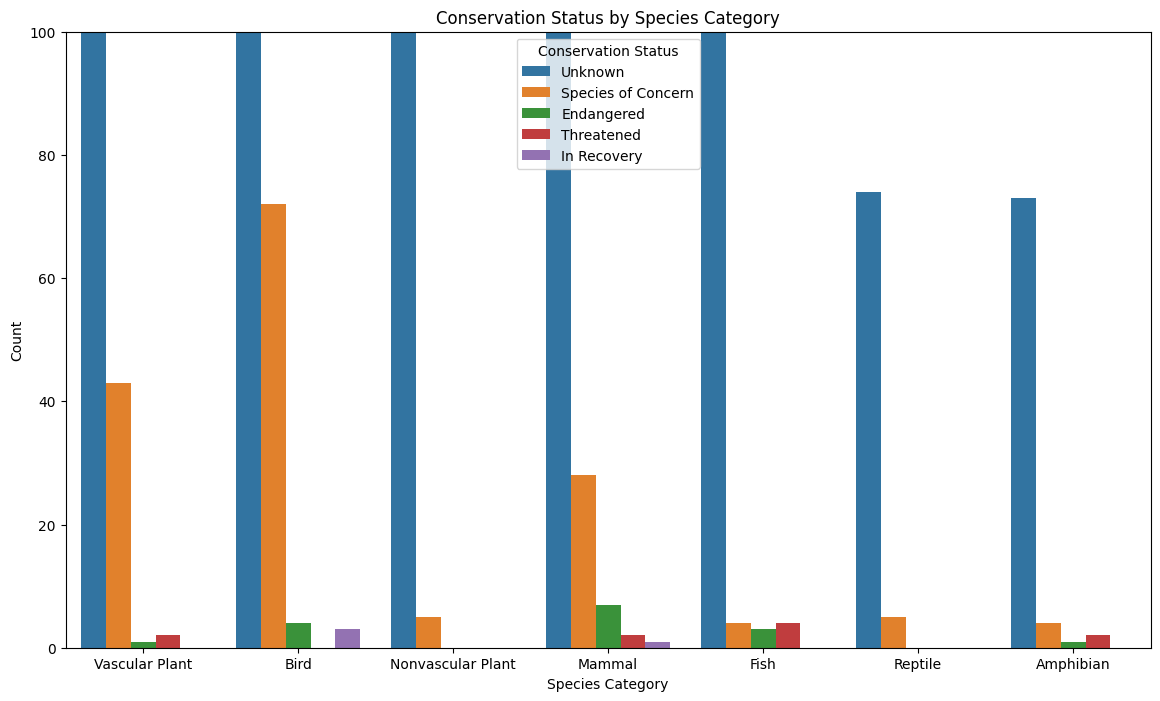

In [69]:
plt.figure(figsize=(14, 8))
sns.barplot(x='category', y='count', hue='conservation_status', data=endangered_counts)
plt.title('Conservation Status by Species Category')
plt.xlabel('Species Category')
plt.ylabel('Count')
plt.legend(title='Conservation Status')
plt.ylim(0, 100)
plt.show()

Based on the provided data, the following conclusions can be drawn:

The most common categories of organisms with an `Unknown` conservation status are vascular plants, birds, and nonvascular plants. This could indicate a lack of data or that these species have not yet been studied.

Birds and vascular plants are most commonly listed as `Species of Concern`. This may indicate that these groups of species are facing certain threats that could affect their future survival.

Among mammals, the statuses `Species of Concern` and `Endangered` are most common. This shows that mammals may be particularly vulnerable to extinction threats.

Only one vascular plant and one amphibian are listed as `Endangered`, which may highlight a critical situation for these particular species.

In summary, while certain categories of species (such as mammals and birds) may be more susceptible to the risk of extinction, the conservation status of the majority of species remains unknown. This suggests a need for further study and monitoring of these species.

- Are the differences between species and their conservation status significant?

In [70]:
cont_table = pd.crosstab(species['category'], species['conservation_status'])

In [71]:
chi2, p, dof, expected = chi2_contingency(cont_table)

print(f"Chi-square Statistic : {chi2}")
print(f"P-value : {p}")

Chi-square Statistic : 628.581965798279
P-value : 2.4551423165990197e-117


Based on the analysis and statistical test conducted, we can make the following conclusion:

The Chi-square statistical test indicates that there is a significant relationship between the species category and their conservation status (p-value < 0.05). This suggests that the differences observed between species categories and their conservation statuses are not random and could be attributed to a specific relationship between these variables.

Therefore, in this case, we can confidently say that some species categories are more at risk of becoming endangered than others and require more attention from conservationists and wildlife agencies.

However, it's important to remember that while statistical tests indicate the presence of a relationship, they do not explain causality and they don't always indicate practical significance of these differences. For a more comprehensive understanding, additional research and data collection may be needed.

- Which species were spotted the most at each park?

In [72]:
most_observed_species = observations.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
most_observed_species = most_observed_species.loc[most_observed_species.groupby('park_name')['observations'].idxmax()]

most_observed_species

,park_name,scientific_name,observations
1359,Bryce National Park,Columba livia,339
10534,Great Smoky Mountains National Park,Streptopelia decaocto,256
13534,Yellowstone National Park,Holcus lanatus,805
19178,Yosemite National Park,Hypochaeris radicata,505


C:\Users\keepd\AppData\Local\Temp\ipykernel_37080\1133027793.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(most_observed_species['park_and_species'], rotation=45, horizontalalignment='right')


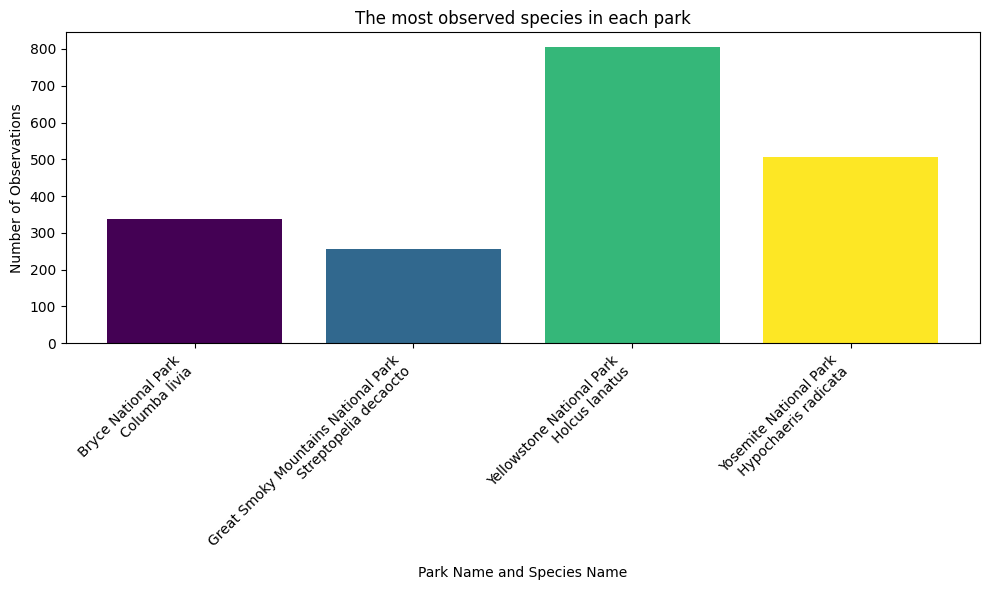

In [73]:
most_observed_species['park_and_species'] = most_observed_species['park_name'] + '\n' + most_observed_species['scientific_name']

fig, ax = plt.subplots(figsize=(10,6))

# Generate a list of colors, with a number of colors equal to the number of bars
colors = plt.cm.viridis(np.linspace(0, 1, len(most_observed_species)))

ax.bar(most_observed_species['park_and_species'], most_observed_species['observations'], color=colors)

ax.set_xlabel('Park Name and Species Name')
ax.set_ylabel('Number of Observations')
ax.set_title('The most observed species in each park')
ax.set_xticklabels(most_observed_species['park_and_species'], rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


Based on the presented data, we can conclude the following about the most frequently observed species in each of the parks:

In Bryce National Park, the most frequently observed species is Columba livia, with an observation count of 339.
In Great Smoky Mountains National Park, the most frequently observed species is Streptopelia decaocto, with an observation count of 256.
In Yellowstone National Park, the most frequently observed species is Holcus lanatus, with an observation count of 805.
In Yosemite National Park, the most frequently observed species is Hypochaeris radicata, with an observation count of 505.
This indicates that for each park in this data set, there is a specific species that was observed more frequently than others. However, it's important to remember that the count of observations may not always be an accurate indicator of species population as it can be influenced by many factors including the size and visibility of the species, the areas within the park where observations were conducted, among others.

# General conclusion #

In conclusion, the analysis of the biodiversity data from the National Parks Service provides valuable insights into the conservation statuses and observations of species in different parks.

The distribution of conservation statuses shows that the majority of species have an unknown conservation status, indicating a need for more comprehensive monitoring and assessment of wildlife populations. Species of Concern make up the second largest category, while Endangered and Threatened species require urgent conservation efforts.

Certain types of species, such as mammals and birds, are more likely to be listed as endangered or in need of conservation attention. This highlights the vulnerability of these species groups to extinction threats.

The analysis also reveals a significant relationship between species categories and their conservation status. This suggests that the differences observed are not random and could be attributed to specific relationships between these variables.

Furthermore, the most frequently observed species in each park provide insights into the species that are frequently encountered or studied. However, it's important to consider other factors that may influence observation counts, such as species visibility and survey efforts.

Overall, this analysis underscores the importance of continued monitoring, conservation efforts, and research to better understand and protect the biodiversity within national parks. The findings can inform conservation strategies and highlight areas where further investigation and action are needed to preserve endangered species and their habitats.